# Plot XRD patterns from dpp files from PeakPo

- Please check [setup_for_notebooks](../0_setup/setup_for_notebooks.ipynb) file if you have problem using the notebooks in this folder.  
- In this notebook, we will learn how to plot XRD patterns using the information saved in `dpp`.  
- `dpp` is a project file saved in `PeakPo`.  You may plot, jcpds information and cake as well as many other information.

This notebook takes advantage of the `PeakPo` modules and other local modules.  They can be found in `../local_modules` folder.  
The cell below defined the search path for this local module folder.

In [ ]:
import sys
sys.path.append('../../peakpo')
sys.path.append('../local_modules')

## Check the versio of pyFAI in your conda environment

In [2]:
import pyFAI
pyFAI.version

'0.14.2'

Note that the example data files I provided are made with `pyFAI` version `0.14`.  If you see version higher than `0.15` here, you will get error when you read the example `dpp` file.  In that case, you either follow the instruction in [setup_for_notebooks.ipynb](./setup_for_notebooks.ipynb) or you may use your own dpp for this note book.

## Read dpp

In [3]:
import dill
import numpy as np

### Change the following two cells for your own dpp file

Data files should be in the `../data` folder.  You need: `dpp`, `chi`, `tif`, and `poni` files.

In [4]:
%ls ../data/*.dpp

../data/hSiO2_404_009.dpp


In [5]:
filen_dpp = '../data/hSiO2_404_009.dpp'

In [6]:
with open(filen_dpp, 'rb') as f:
    model_dpp = dill.load(f)

The cells below show how to look into the data structure of the `model_dpp` and get values from it.

In [7]:
model_dpp.__dict__

{'base_ptn': <ds_powdiff.DiffractionPattern.PatternPeakPo at 0x1213fbe80>,
 'waterfall_ptn': [],
 'jcpds_lst': [<ds_jcpds.jcpds.JCPDSplt at 0x12e860be0>,
 'ucfit_lst': [],
 'diff_img': <ds_cake.DiffractionImage.DiffImg at 0x12e85ec50>,
 'poni': '/Users/DanShim/Dropbox (ASU)/Desktop/PMatRes/github-dev/XRD-peakpo/data/hStv/LaB6_37keV_p49_center.poni',
 'session': <ds_jcpds.jcpds.Session at 0x12e86fa20>,
 'jcpds_path': '/Users/DanShim/Python/jcpds',
 'chi_path': '/Users/DanShim/Dropbox (ASU)/Desktop/PMatRes/github-dev/XRD-peakpo/data/hStv',
 'current_section': None,
 'section_lst': [],
 'saved_pressure': 39.6,
 'saved_temperature': 300.0}

## Setup a new PeakPo model and assign info from dpp

In [8]:
from model import PeakPoModel
model = PeakPoModel()

Make sure to reset the chi folder location using the `new_chi_path` option.

In [9]:
model.set_from(model_dpp, new_chi_path='../data')

## Make XRD plot

The following three modules are all in the `../local_modules` folder.

In [10]:
from xrd_unitconv import * # Make conversios between different x-axis units

In [11]:
import quick_plots as quick # A function to plot XRD pattern
import fancy_plots as fancy # A function to plot XRD pattern

In [12]:
%matplotlib inline

In [13]:
import matplotlib.pyplot as plt

## Let's make some plots

Let's plot in regular scale.

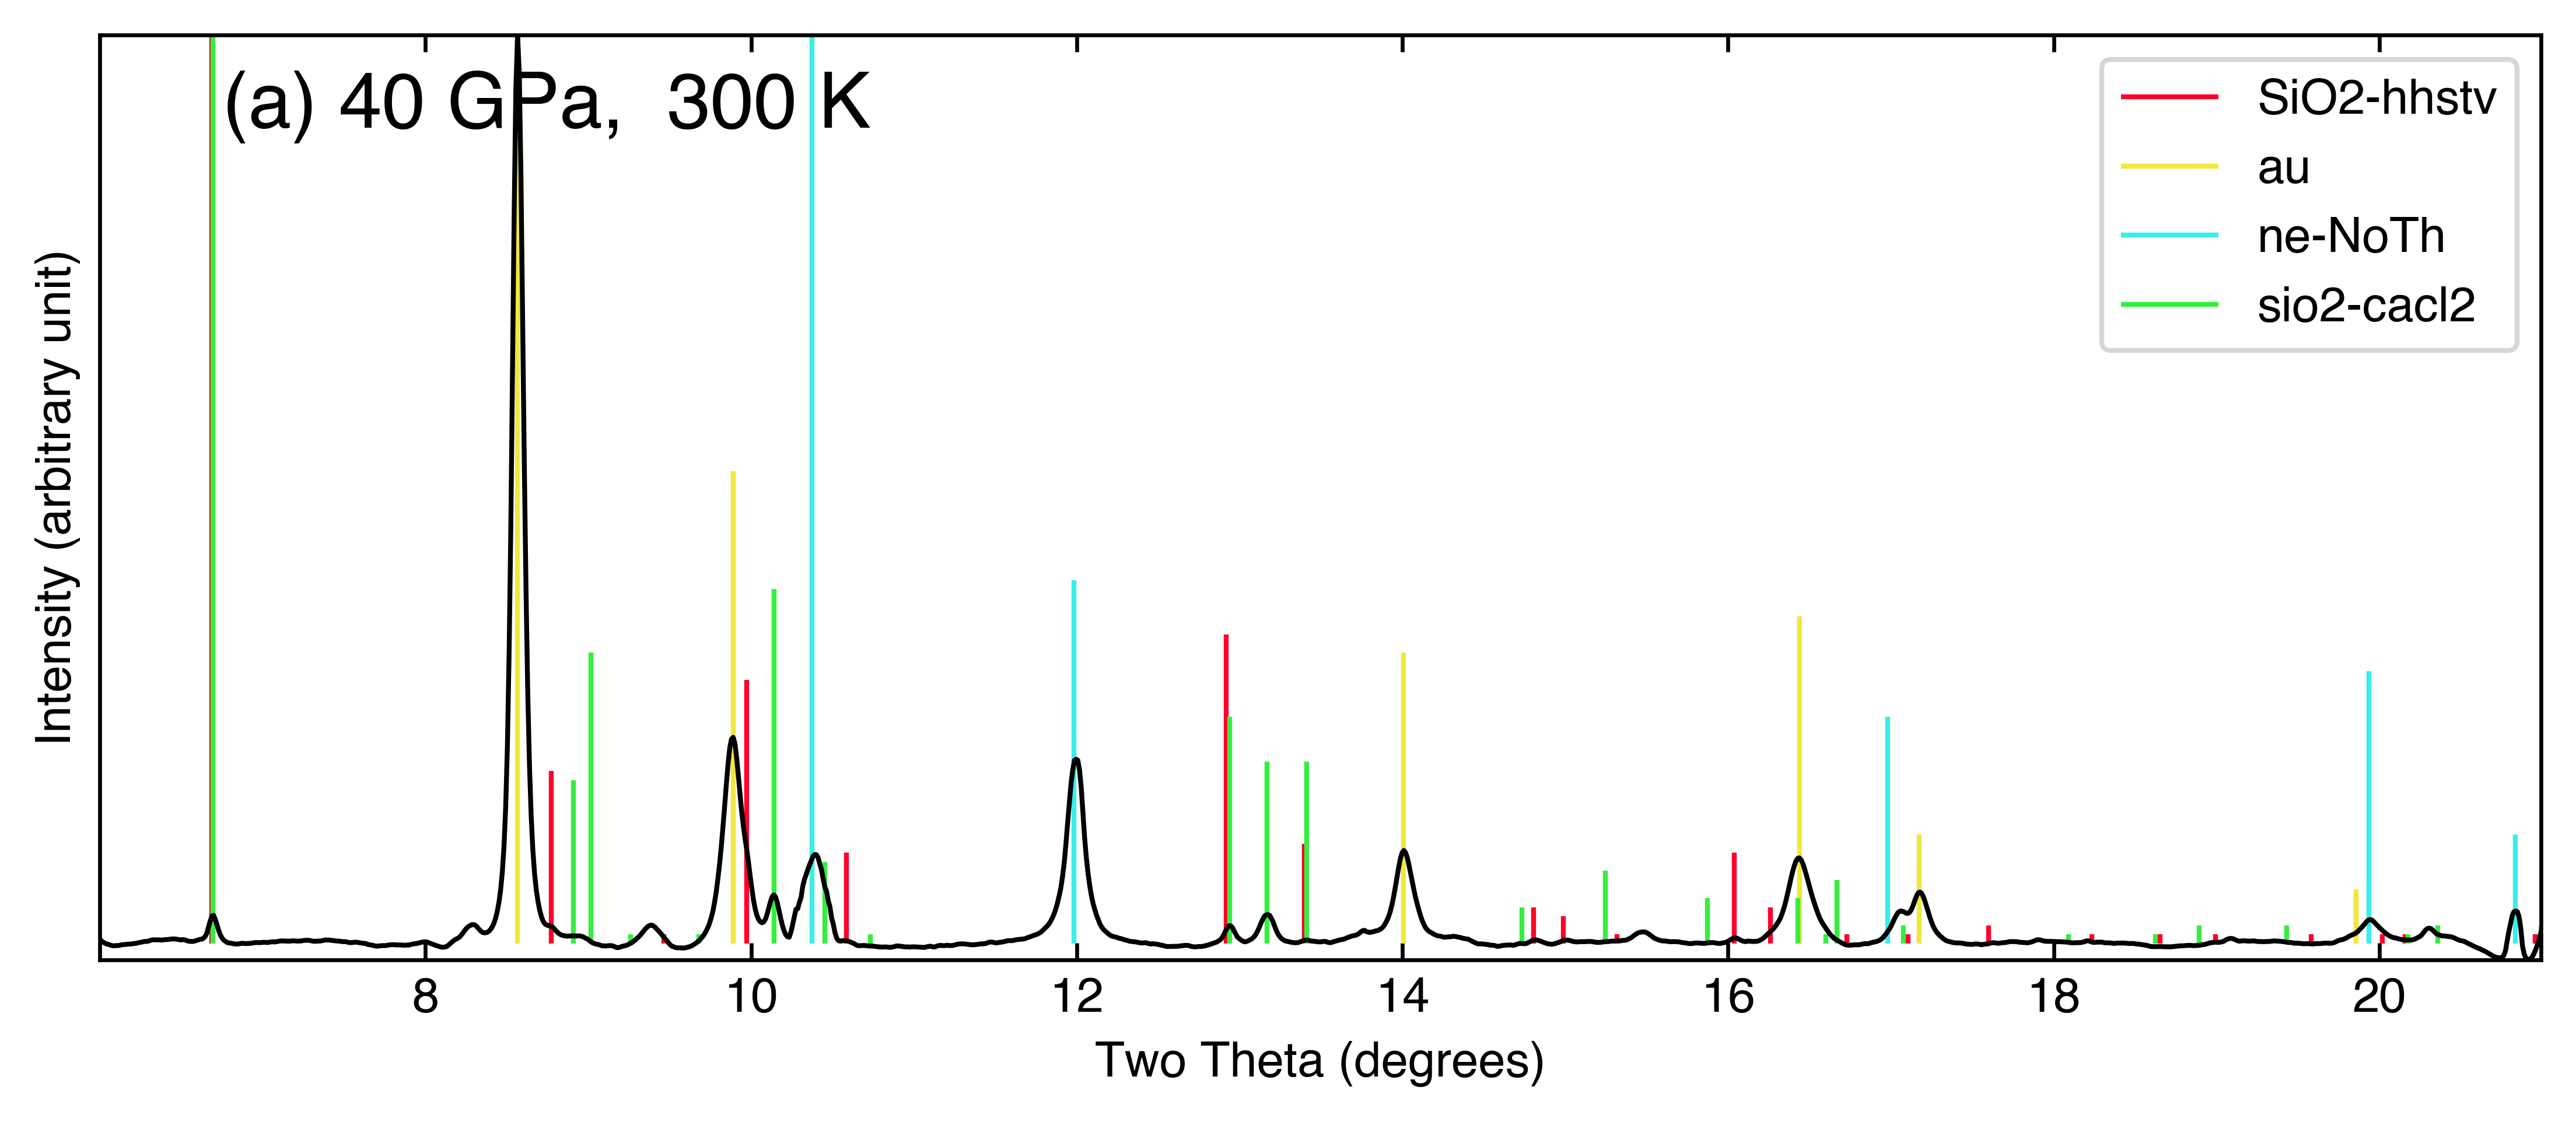

In [14]:
f, ax = plt.subplots(figsize=(9,3.5), dpi=300)
quick.plot_diffpattern(ax, model)
quick.plot_jcpds(ax, model)
pressure = model.get_saved_pressure()
temperature = model.get_saved_temperature()
ax.text(0.05,0.9, "(a) {0:.0f} GPa, {1: .0f} K".format(pressure, temperature), 
        transform = ax.transAxes, fontsize=16)
plt.savefig('test-1.pdf', bbox_inches='tight')

## Let's do some fancy stuff

I wrote similar plot functions with more options in `fancy_plots.py` in the same folder.

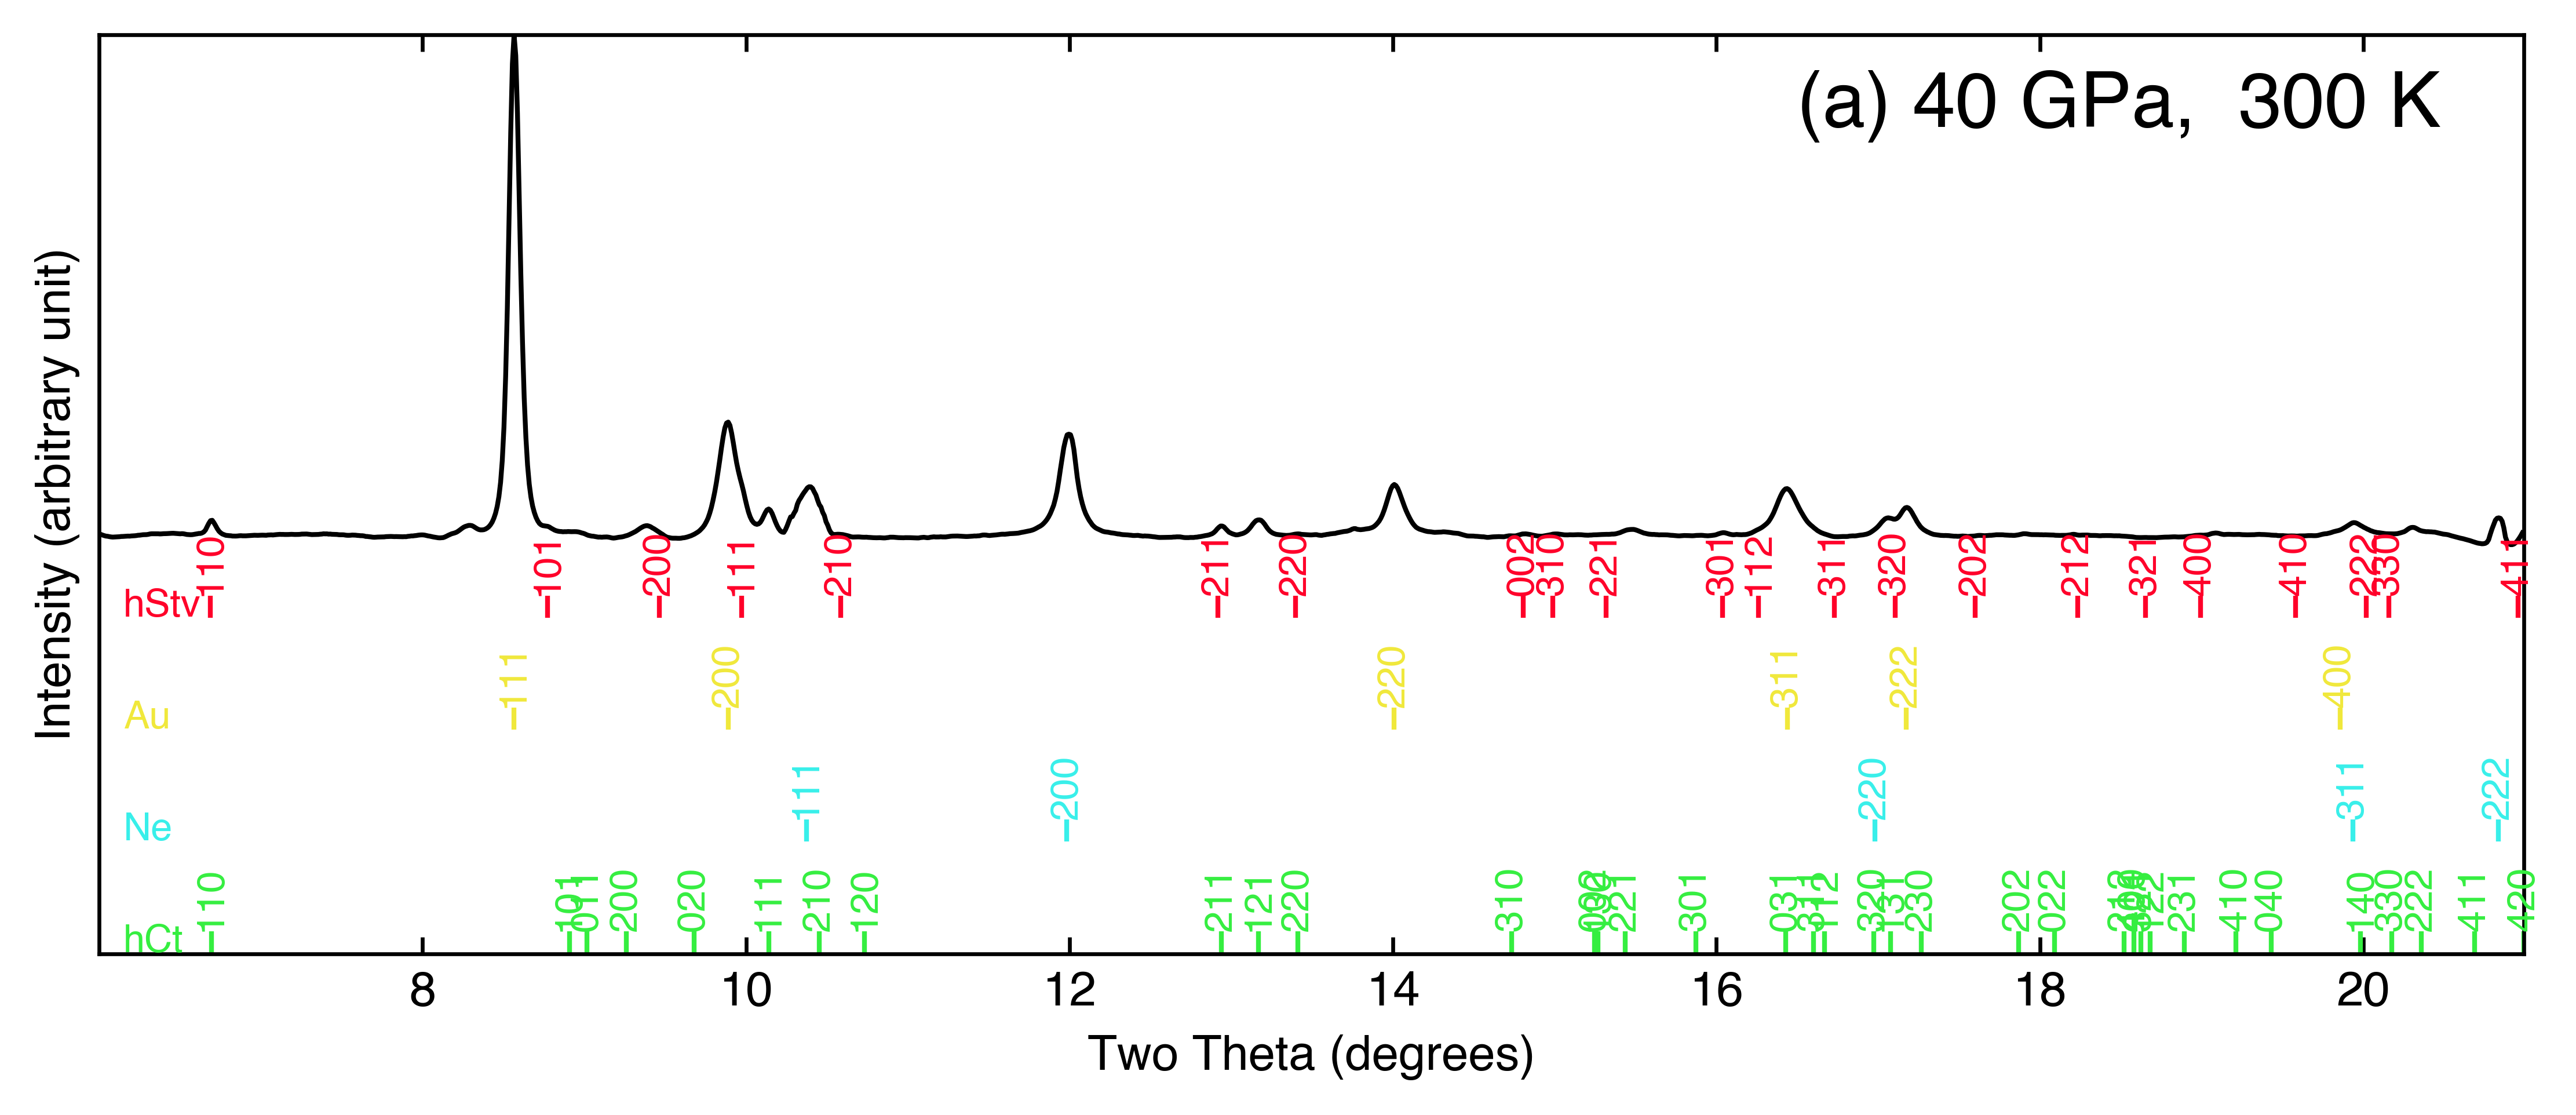

In [15]:
f, ax = plt.subplots(figsize=(9,3.5), dpi=300)
fancy.plot_diffpattern(ax, model)
fancy.plot_jcpds(ax, model, bar_position=0.1, bar_height=5, 
           show_index=True, 
           phase_names = ['hStv', 'Au', 'Ne', 'hCt'], bar_vsep=5.)
pressure = model.get_saved_pressure()
temperature = model.get_saved_temperature()
ax.text(0.70,0.9, "(a) {0:.0f} GPa, {1: .0f} K".format(pressure, temperature), 
        transform = ax.transAxes, fontsize=16)
plt.savefig('test-2.pdf', bbox_inches='tight')

In the plot below, we plot diffraction pattern in $2\theta$ scale to prevent any distortion in the diffraction pattern.  We just plot tickmarks in d-spacing scale.

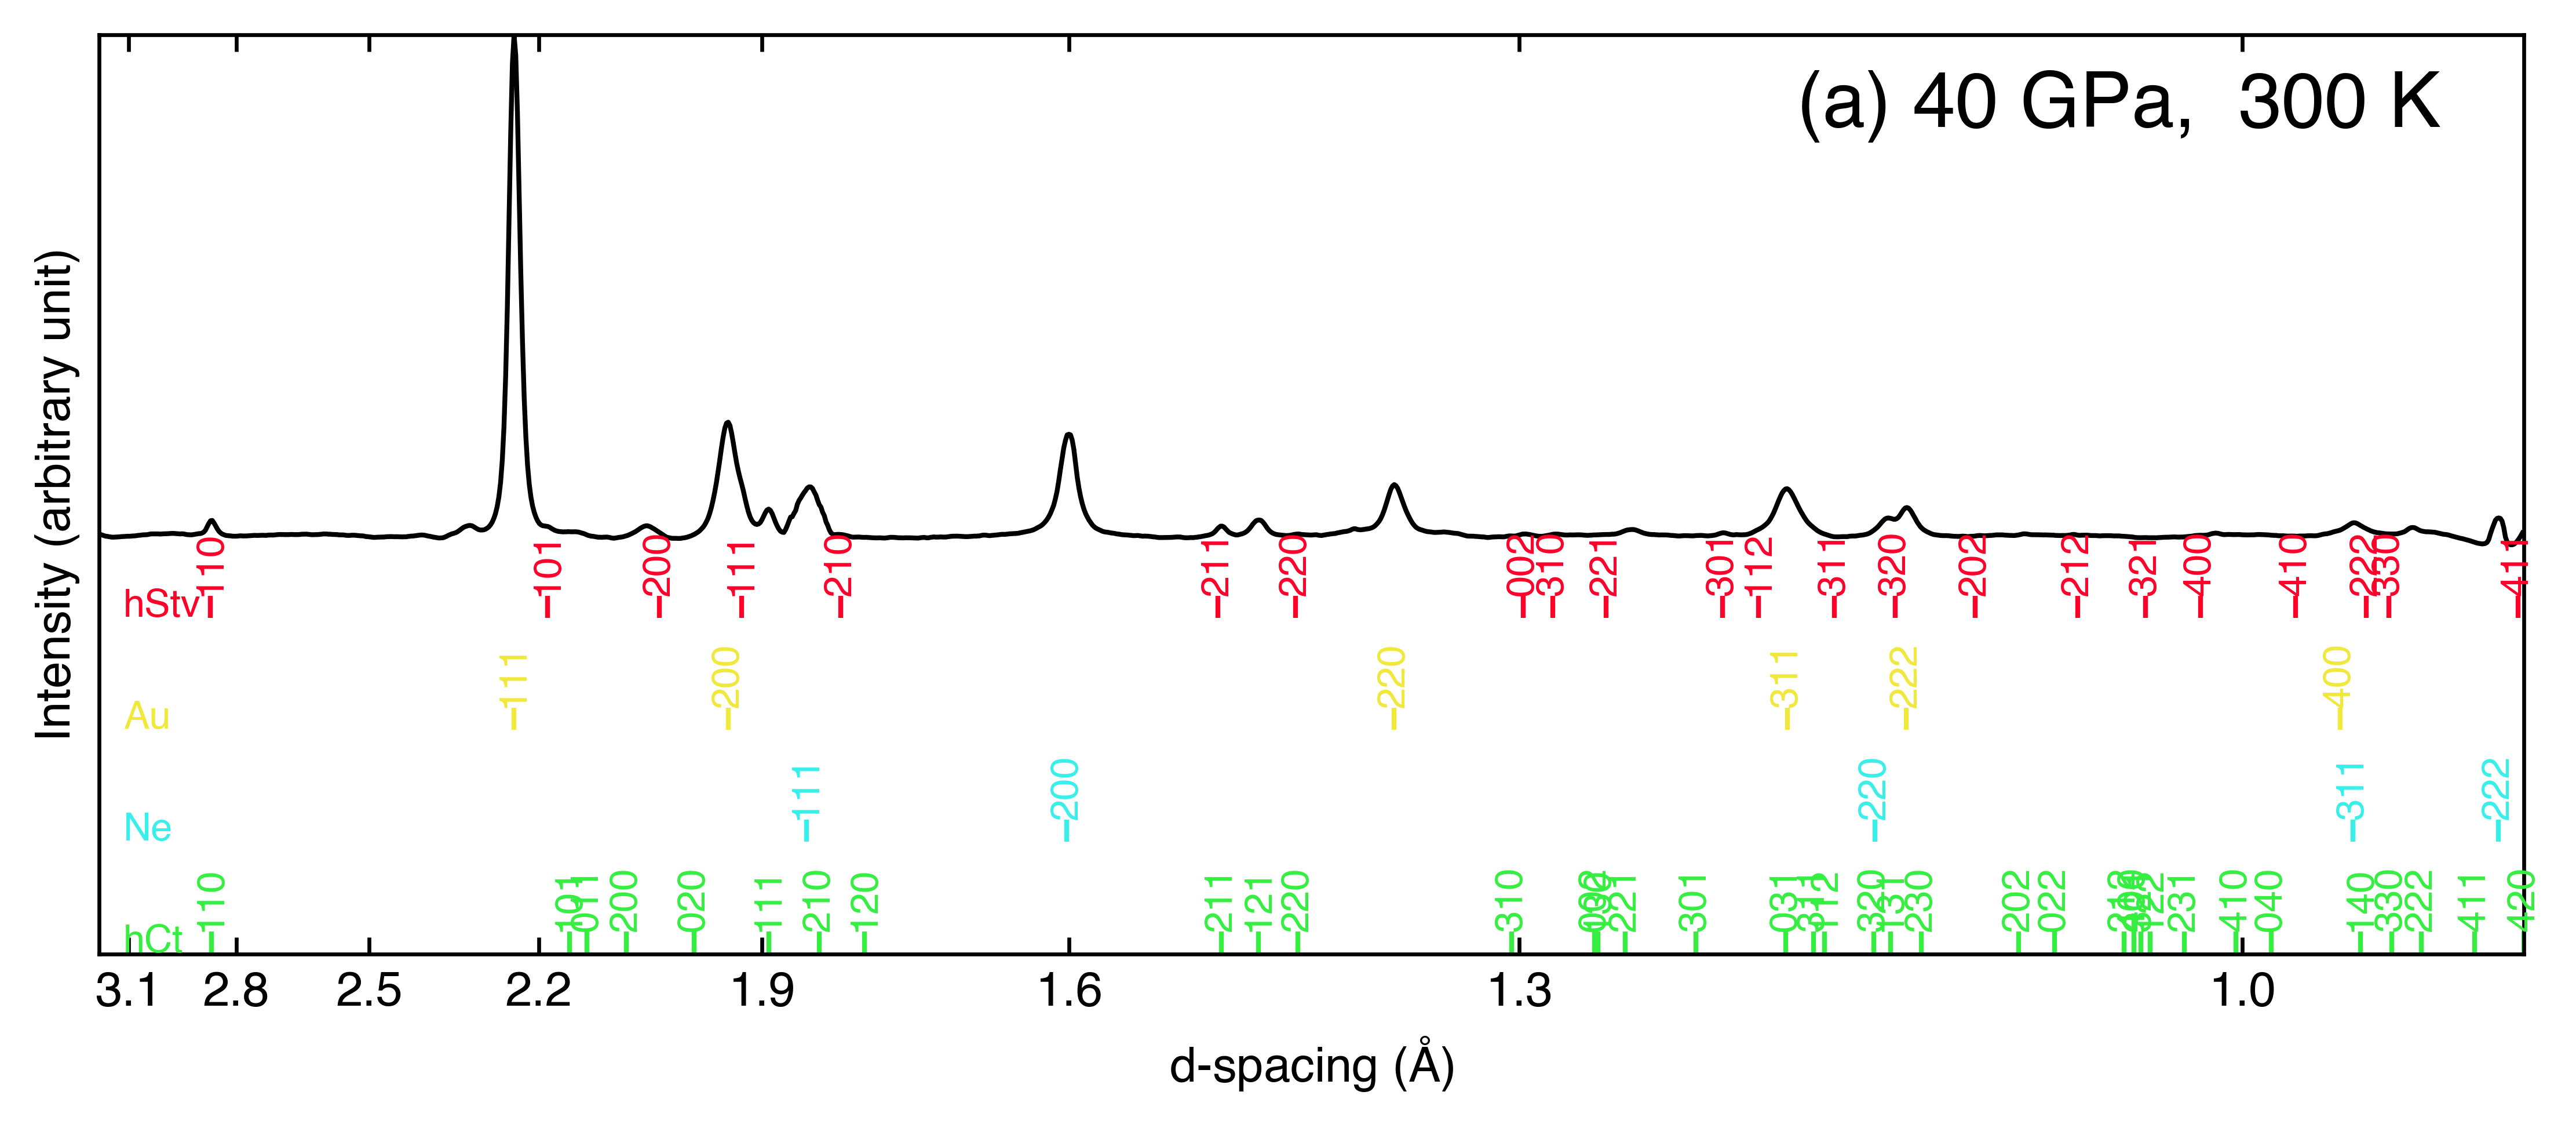

In [16]:
f, ax = plt.subplots(figsize=(9,3.5), dpi=300)
fancy.plot_diffpattern(ax, model, dsp_ticks=True, dsp_step=0.3)
fancy.plot_jcpds(ax, model, bar_position=0.1, bar_height=5, 
           show_index=True, 
           phase_names = ['hStv', 'Au', 'Ne', 'hCt'], bar_vsep=5.)
pressure = model.get_saved_pressure()
temperature = model.get_saved_temperature()
ax.text(0.70,0.9, "(a) {0:.0f} GPa, {1: .0f} K".format(pressure, temperature), 
        transform = ax.transAxes, fontsize=16)
plt.savefig('test-2-dsp.pdf', bbox_inches='tight')